In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from os import listdir
from os.path import isfile, join

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
CSV_DIR = '../csv/metricas_redes_complexas'
IMG_DIR = '../img/'

In [3]:
# monta o dataframe Pandas usando todos os arquivos .csv
csv_files = [f for f in listdir(CSV_DIR) if (isfile(join(CSV_DIR, f)))]
dataframes = []
for f in csv_files:
    df = pd.read_csv(join(CSV_DIR, f), low_memory = False)
    dataframes.append(df)
df_metricas = pd.concat(dataframes)

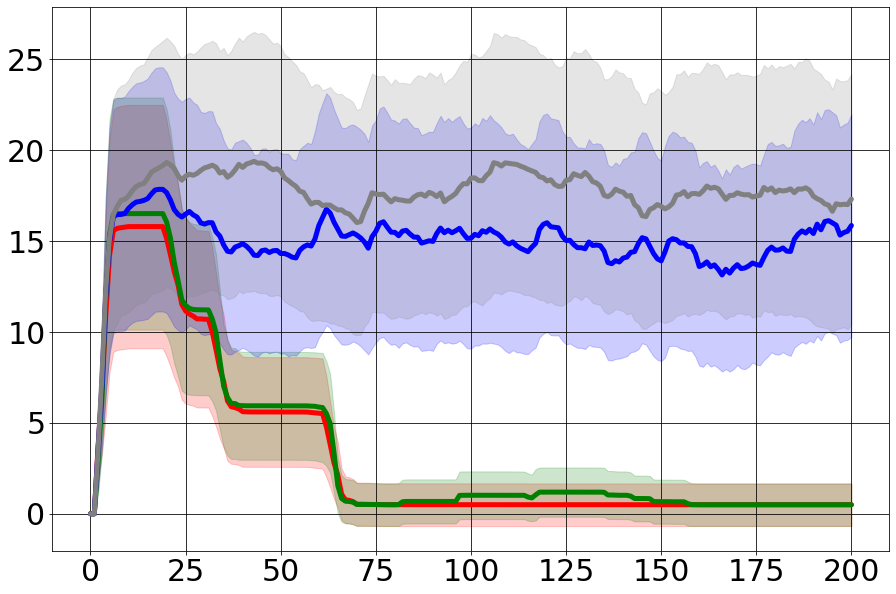

In [5]:
timeout = 3
hosts = 30
ci = 68
fig, axes = plt.subplots(figsize = (15, 10))
colors = ['red', 'green', 'blue', 'gray']
axes.xaxis.grid(True, color = "black")
axes.yaxis.grid(True, color = "black")
sns.set_style("whitegrid", {'grid.linestyle': '-'})
df = df_metricas.query('hosts == {0}'.format(hosts)).groupby(by = ['snapshot', 'speed'], as_index = False).agg({'avg_degree': 'mean', 'std_degree': 'mean'})
g = sns.lineplot(data = df, x = 'snapshot', y = 'avg_degree', hue = 'speed', palette = colors, ax = axes, linestyle = 'solid', legend = False, linewidth = 5)
g.set(xlabel = None, ylabel = None, title = None)
g.tick_params(labelsize = 30)
for speed in range(4):
    dfs = df.query('speed == {0}'.format(speed))
    plt.fill_between(x = dfs['snapshot'], y1 = dfs['avg_degree'] - dfs['std_degree'], y2 = dfs['avg_degree'] + dfs['std_degree'], color = colors[speed], alpha = 0.2)
#g.set_title("Average Degree x Speed [timeout = {0}; hosts = {1}; ci = {2}%]".format(timeout, hosts, ci))
#plt.legend(loc = 'upper left', title = 'speed')
plt.savefig(join(IMG_DIR, "Average Degree x Speed [timeout = {0}; hosts = {1}; ci = {2}].png".format(timeout, hosts, ci)))
plt.show()

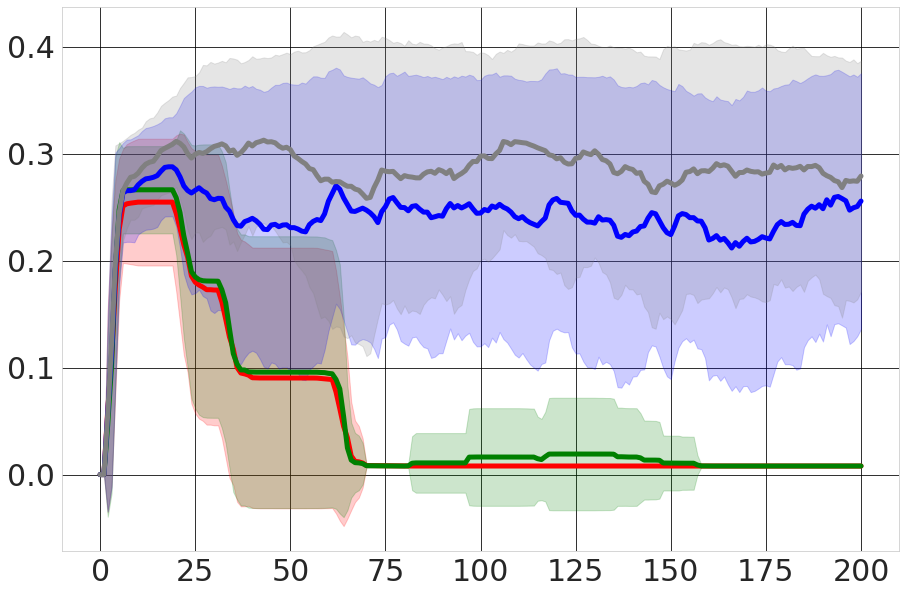

In [29]:
timeout = 3
hosts = 30
ci = 68
fig, axes = plt.subplots(figsize = (15, 10))
colors = ['red', 'green', 'blue', 'gray']
axes.xaxis.grid(True, color = "black")
axes.yaxis.grid(True, color = "black")
sns.set_style("whitegrid", {'grid.linestyle': '-'})
df = df_metricas.query('hosts == {0}'.format(hosts)).groupby(by = ['snapshot', 'speed'], as_index = False).agg({'density': ['mean', 'std']})
df.columns = [' '.join(col).strip() for col in df.columns.values]
g = sns.lineplot(data = df, x = 'snapshot', y = 'density mean', hue = 'speed', palette = colors, ax = axes, linestyle = 'solid', legend = False, linewidth = 5)
g.set(xlabel = None, ylabel = None, title = None)
g.tick_params(labelsize = 30)
for speed in range(4):
    dfs = df.query('speed == {0}'.format(speed))
    plt.fill_between(x = dfs['snapshot'], y1 = dfs['density mean'] - dfs['density std'], y2 = dfs['density mean'] + dfs['density std'], color = colors[speed], alpha = 0.2)
#g.set_title("Average Density x Speed [timeout = {0}; hosts = {1}; ci = {2}%]".format(timeout, hosts, ci))
#plt.legend(loc = 'upper left', title = 'speed')
plt.savefig(join(IMG_DIR, "Average Density x Speed [timeout = {0}; hosts = {1}; ci = {2}].png".format(timeout, hosts, ci)))
plt.show()

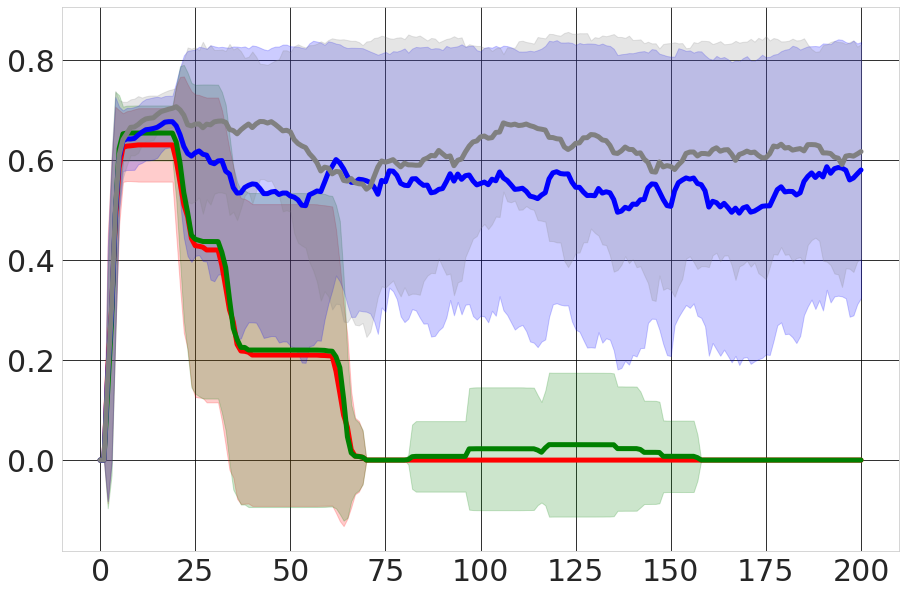

In [32]:
timeout = 3
hosts = 30
ci = 68
fig, axes = plt.subplots(figsize = (15, 10))
colors = ['red', 'green', 'blue', 'gray']
axes.xaxis.grid(True, color = "black")
axes.yaxis.grid(True, color = "black")
sns.set_style("whitegrid", {'grid.linestyle': '-'})
df = df_metricas.query('hosts == {0}'.format(hosts)).groupby(by = ['snapshot', 'speed'], as_index = False).agg({'avg_clustering_coef': ['mean', 'std']})
df.columns = [' '.join(col).strip() for col in df.columns.values]
g = sns.lineplot(data = df, x = 'snapshot', y = 'avg_clustering_coef mean', hue = 'speed', palette = colors, ax = axes, linestyle = 'solid', legend = False, linewidth = 5)
g.set(xlabel = None, ylabel = None, title = None)
g.tick_params(labelsize = 30)
for speed in range(4):
    dfs = df.query('speed == {0}'.format(speed))
    plt.fill_between(x = dfs['snapshot'], y1 = dfs['avg_clustering_coef mean'] - dfs['avg_clustering_coef std'], y2 = dfs['avg_clustering_coef mean'] + dfs['avg_clustering_coef std'], color = colors[speed], alpha = 0.2)
#g.set_title("Average Clustering Coef. x Speed [timeout = {0}; hosts = {1}; ci = {2}%]".format(timeout, hosts, ci))
#plt.legend(loc = 'upper left', title = 'speed')
plt.savefig(join(IMG_DIR, "Average Clustering Coef. x Speed [timeout = {0}; hosts = {1}; ci = {2}].png".format(timeout, hosts, ci)))
plt.show()

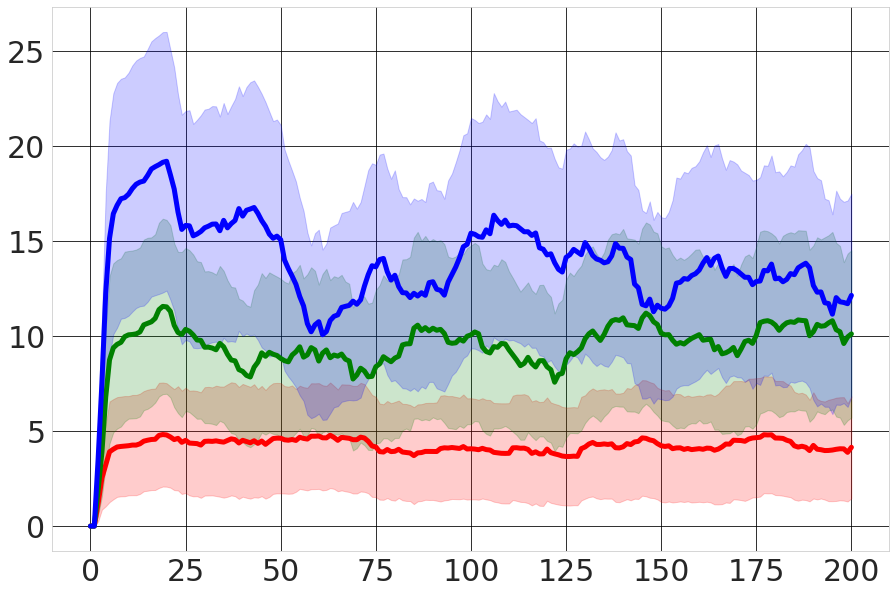

In [39]:
timeout = 3
speed = 3
ci = 68
fig, axes = plt.subplots(figsize = (15, 10))
axes.xaxis.grid(True, color = "black")
axes.yaxis.grid(True, color = "black")
sns.set_style("whitegrid", {'grid.linestyle': '-'})
colors = ['red', 'green', 'blue']
df = df_metricas.query('timeout == {0} and speed == {1}'.format(timeout, speed)).groupby(by = ['snapshot', 'hosts'], as_index = False).agg({'avg_degree': 'mean', 'std_degree': 'mean'})
g = sns.lineplot(data = df, x = 'snapshot', y = 'avg_degree', hue = 'hosts', palette = colors, ax = axes, linestyle = 'solid', legend = False, linewidth = 5)
g.set(xlabel = None, ylabel = None, title = None)
g.tick_params(labelsize = 30)
for hosts in [10, 20, 30]:
    dfs = df.query('hosts == {0}'.format(hosts))
    plt.fill_between(x = dfs['snapshot'], y1 = dfs['avg_degree'] - dfs['std_degree'], y2 = dfs['avg_degree'] + dfs['std_degree'], color = colors[int(hosts / 10 - 1)], alpha = 0.2)
#g.set_title("Average Degree x Hosts [timeout = {0}; speed = {1}; ci = {2}%]".format(timeout, speed, ci))
#plt.legend(loc = 'upper left', title = 'hosts')
plt.savefig(join(IMG_DIR, "Average Degree x Hosts [timeout = {0}; speed = {1}; ci = {2}].png".format(timeout, speed, ci)))
plt.show()

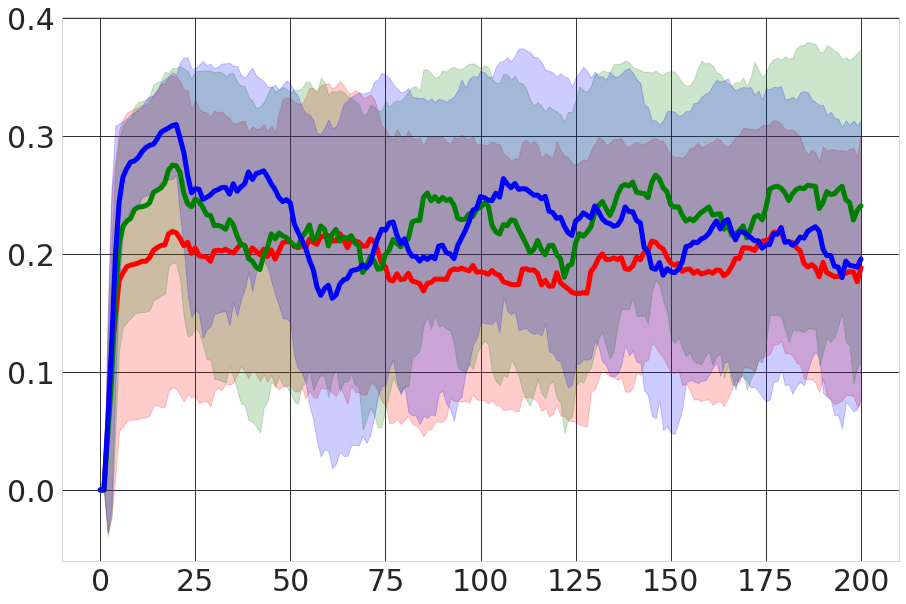

In [46]:
timeout = 3
speed = 3
ci = 68
fig, axes = plt.subplots(figsize = (15, 10))
axes.xaxis.grid(True, color = "black")
axes.yaxis.grid(True, color = "black")
sns.set_style("whitegrid", {'grid.linestyle': '-'})
colors = ['red', 'green', 'blue']
df = df_metricas.query('timeout == {0} and speed == {1}'.format(timeout, speed)).groupby(by = ['snapshot', 'hosts'], as_index = False).agg({'density': ['mean', 'std']})
df.columns = [' '.join(col).strip() for col in df.columns.values]
g = sns.lineplot(data = df, x = 'snapshot', y = 'density mean', hue = 'hosts', palette = colors, ax = axes, linestyle = 'solid', legend = False, linewidth = 5)
g.set(xlabel = None, ylabel = None, title = None)
g.tick_params(labelsize = 30)
for hosts in [10, 20, 30]:
    dfs = df.query('hosts == {0}'.format(hosts))
    plt.fill_between(x = dfs['snapshot'], y1 = dfs['density mean'] - dfs['density std'], y2 = dfs['density mean'] + dfs['density std'], color = colors[int(hosts / 10 - 1)], alpha = 0.2)
#g.set_title("Average Density x Hosts [timeout = {0}; speed = {1}; ci = {2}%]".format(timeout, speed, ci))
#plt.legend(loc = 'upper left', title = 'hosts')
plt.savefig(join(IMG_DIR, "Average Density x Hosts [timeout = {0}; speed = {1}; ci = {2}].png".format(timeout, speed, ci)))
plt.show()

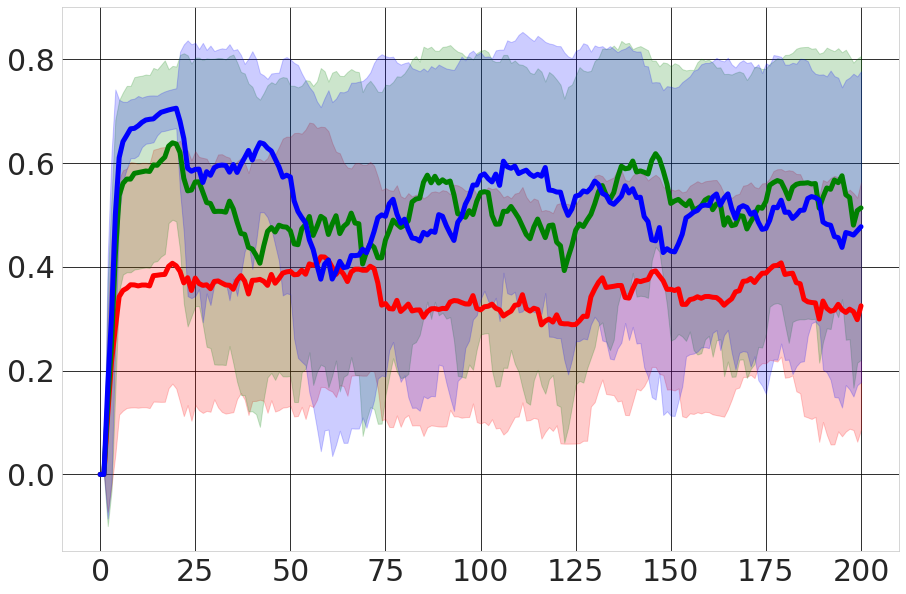

In [54]:
timeout = 3
speed = 3
ci = 68
fig, axes = plt.subplots(figsize = (15, 10))
axes.xaxis.grid(True, color = "black")
axes.yaxis.grid(True, color = "black")
sns.set_style("whitegrid", {'grid.linestyle': '-'})
colors = ['red', 'green', 'blue']
df = df_metricas.query('timeout == {0} and speed == {1}'.format(timeout, speed)).groupby(by = ['snapshot', 'hosts'], as_index = False).agg({'avg_clustering_coef': ['mean', 'std']})
df.columns = [' '.join(col).strip() for col in df.columns.values]
g = sns.lineplot(data = df, x = 'snapshot', y = 'avg_clustering_coef mean', hue = 'hosts', palette = colors, ax = axes, linestyle = 'solid', legend = False, linewidth = 5)
g.set(xlabel = None, ylabel = None, title = None)
g.tick_params(labelsize = 30)
for hosts in [10, 20, 30]:
    dfs = df.query('hosts == {0}'.format(hosts))
    plt.fill_between(x = dfs['snapshot'], y1 = dfs['avg_clustering_coef mean'] - dfs['avg_clustering_coef std'], y2 = dfs['avg_clustering_coef mean'] + dfs['avg_clustering_coef std'], color = colors[int(hosts / 10 - 1)], alpha = 0.2)
#g.set_title("Average Clustering Coef. x Hosts [timeout = {0}; speed = {1}; ci = {2}]".format(timeout, speed, ci))
#plt.legend(loc = 'upper left', title = 'hosts')
plt.savefig(join(IMG_DIR, "Average Clustering Coef. x Hosts [timeout = {0}; speed = {1}; ci = {2}].png".format(timeout, speed, ci)))
plt.show()

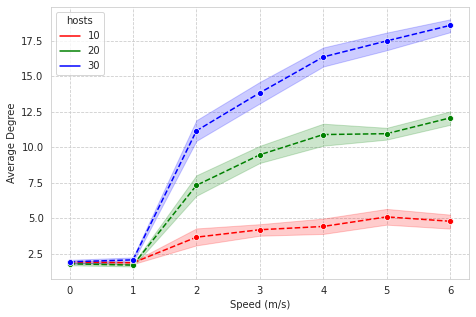

In [8]:
# Average Degree x Speed x Hosts
timeout = 3
ci = 95
fig, ax = plt.subplots(figsize = (7.5, 5))
ax.xaxis.grid(True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
df = df_metricas.query('timeout == {0}'.format(timeout)).groupby(by = ['hosts', 'speed', 'round_idx'], as_index = False).agg({'avg_degree': 'mean', 'std_degree': 'mean'})
df['hosts'] = df['hosts'].astype(int)
g = sns.lineplot(data = df, x = 'speed', y = 'avg_degree', hue = 'hosts', ax = ax, palette = ['red', 'green', 'blue'], marker = 'o', linestyle = "dashed", err_style = "band", ci = ci, estimator = np.mean);
g.set_xticks(range(7))
g.set(xlabel = "Speed (m/s)", ylabel = "Average Degree", title = None)
plt.show()

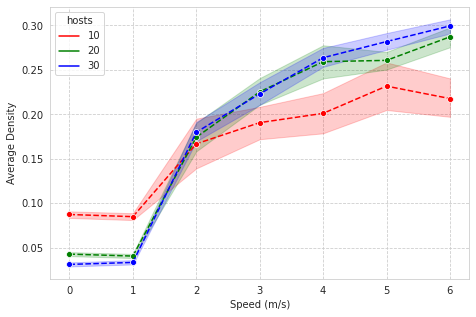

In [9]:
# Average Density x Speed x Hosts
timeout = 3
ci = 95
fig, ax = plt.subplots(figsize = (7.5, 5))
ax.xaxis.grid(True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
df = df_metricas.query('timeout == {0}'.format(timeout)).groupby(by = ['hosts', 'speed', 'round_idx'], as_index = False).agg({'density': ['mean', 'std']})
df['hosts'] = df['hosts'].astype(int)
df.columns = [' '.join(col).strip() for col in df.columns.values]
g = sns.lineplot(data = df, x = 'speed', y = 'density mean', hue = 'hosts', ax = ax, palette = ['red', 'green', 'blue'], marker = 'o', linestyle = "dashed", err_style = "band", ci = ci, estimator = np.mean);
g.set_xticks(range(7))
g.set(xlabel = "Speed (m/s)", ylabel = "Average Density", title = None)
plt.show()

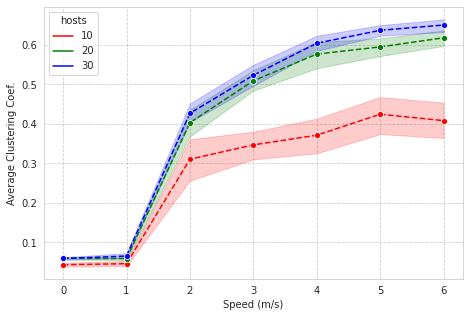

In [10]:
# Average Density x Speed x Hosts
timeout = 3
ci = 95
fig, ax = plt.subplots(figsize = (7.5, 5))
ax.xaxis.grid(True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
df = df_metricas.query('timeout == {0}'.format(timeout)).groupby(by = ['hosts', 'speed', 'round_idx'], as_index = False).agg({'avg_clustering_coef': ['mean', 'std']})
df['hosts'] = df['hosts'].astype(int)
df.columns = [' '.join(col).strip() for col in df.columns.values]
g = sns.lineplot(data = df, x = 'speed', y = 'avg_clustering_coef mean', hue = 'hosts', ax = ax, palette = ['red', 'green', 'blue'], marker = 'o', linestyle = "dashed", err_style = "band", ci = ci, estimator = np.mean);
g.set_xticks(range(7))
g.set(xlabel = "Speed (m/s)", ylabel = "Average Clustering Coef.", title = None)
plt.show()